In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
###The goal of this project is to determine what characteristics are most important for employee retention.
# To accomplish this goal, we will use random forest modeling to check for feature importance and we will also use
#correlation.


In [3]:
df = pd.read_csv('C:\\USers\\tilleymusprime\\Desktop\\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.shape

(1470, 35)

In [5]:
df.isnull().sum()
#It looks like there aren't any missing values in the data

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df = pd.get_dummies(df)
#To get this data into modeling format, we will split all of the columns that contain categorical data into 1's and 0's

In [7]:
df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_No',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gen

In [8]:
#####df.to_csv('C:\\Users\\tilleymusprime\\Desktop\\ibmdf.csv')

In [9]:
#Now that the data is clean and ready for analysis, we will start with the overall data set.
df1 = df[['Attrition_Yes','Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y', 'OverTime_Yes']]
       
###Dropped Attrition_No since it is just the opposite of Attrition Yes. Dropping Overtime_No as well since it is the
#same as overtime_Yes

In [10]:
df_corr = df1.corr()

In [11]:
positive_corr = df_corr[df_corr['Attrition_Yes'] > 0]
negative_corr = df_corr[df_corr['Attrition_Yes'] < 0]

In [12]:
positive_corr['Attrition_Yes'].sort_values(ascending = False)
#It looks like the strongest attributes come from working overtime and frequent travelling 
#This indicates that people who are single are more willing to take risks and leave a company for something else
#Finally, working in sales or being a lab tech is a very transferable skill as opposed to other positions.  This makes them 
#more likely to move to a different company.  Sales could be a good variable to look at later

Attrition_Yes                       1.000000
OverTime_Yes                        0.246118
MaritalStatus_Single                0.175419
JobRole_Sales Representative        0.157234
BusinessTravel_Travel_Frequently    0.115143
JobRole_Laboratory Technician       0.098290
Department_Sales                    0.080855
DistanceFromHome                    0.077924
EducationField_Technical Degree     0.069355
EducationField_Marketing            0.055781
NumCompaniesWorked                  0.043494
EducationField_Human Resources      0.036466
JobRole_Human Resources             0.036215
Gender_Male                         0.029453
JobRole_Sales Executive             0.019774
Department_Human Resources          0.016832
MonthlyRate                         0.015170
PerformanceRating                   0.002889
Name: Attrition_Yes, dtype: float64

In [13]:
negative_corr['Attrition_Yes'].sort_values()
#The longer people work for a company, the less likely they are to leave that company. 
#As people get older, they are less likely to leave that company.  Since young people are more likely to leave,
#we will analyze the age variable more shortly
#Finally, as job satisfaction increases, retention increases

TotalWorkingYears                   -0.171063
JobLevel                            -0.169105
YearsInCurrentRole                  -0.160545
MonthlyIncome                       -0.159840
Age                                 -0.159205
YearsWithCurrManager                -0.156199
StockOptionLevel                    -0.137145
YearsAtCompany                      -0.134392
JobInvolvement                      -0.130016
JobSatisfaction                     -0.103481
EnvironmentSatisfaction             -0.103369
MaritalStatus_Married               -0.090984
JobRole_Research Director           -0.088870
MaritalStatus_Divorced              -0.087716
Department_Research & Development   -0.085293
JobRole_Manager                     -0.083316
JobRole_Manufacturing Director      -0.082994
JobRole_Healthcare Representative   -0.078696
BusinessTravel_Non-Travel           -0.074457
WorkLifeBalance                     -0.063939
TrainingTimesLastYear               -0.059478
DailyRate                         

In [14]:
#Let's take a more in-depth look at people 30 and under (I personally am 31 so please do not take offense at over 30 being old)
young = df1[df1['Age'] <=30]

In [15]:
young_corr = young.corr()
positive_corryoung = young_corr[young_corr['Attrition_Yes'] > 0]
negative_corryoung = young_corr[young_corr['Attrition_Yes'] < 0]

In [16]:
positive_corryoung['Attrition_Yes'].sort_values(ascending=False)

Attrition_Yes                       1.000000
OverTime_Yes                        0.338356
MaritalStatus_Single                0.247768
JobRole_Sales Representative        0.215855
BusinessTravel_Travel_Frequently    0.187115
EducationField_Technical Degree     0.171396
EducationField_Human Resources      0.116902
NumCompaniesWorked                  0.108753
EducationField_Marketing            0.094123
JobRole_Laboratory Technician       0.089823
JobRole_Human Resources             0.084691
Department_Human Resources          0.084691
MonthlyRate                         0.072677
Department_Sales                    0.050920
Education                           0.050521
DistanceFromHome                    0.047377
Gender_Female                       0.038728
Name: Attrition_Yes, dtype: float64

In [17]:
negative_corryoung['Attrition_Yes'].sort_values()

YearsAtCompany                      -0.288052
TotalWorkingYears                   -0.272667
YearsWithCurrManager                -0.245101
YearsInCurrentRole                  -0.244458
JobLevel                            -0.222537
MonthlyIncome                       -0.214636
Age                                 -0.201342
StockOptionLevel                    -0.200500
JobInvolvement                      -0.177832
MaritalStatus_Divorced              -0.148085
JobRole_Manufacturing Director      -0.135318
MaritalStatus_Married               -0.122499
DailyRate                           -0.121624
JobSatisfaction                     -0.118842
JobRole_Sales Executive             -0.116171
EnvironmentSatisfaction             -0.110410
BusinessTravel_Non-Travel           -0.104351
EducationField_Medical              -0.102176
BusinessTravel_Travel_Rarely        -0.094055
Department_Research & Development   -0.084802
EducationField_Life Sciences        -0.070968
YearsSinceLastPromotion           

In [18]:
old = df1[df1['Age'] > 30]

In [19]:
old_corr = old.corr()
positive_corrold = old_corr[old_corr['Attrition_Yes'] > 0]
negative_corrold = old_corr[old_corr['Attrition_Yes'] < 0]

In [20]:
positive_corrold['Attrition_Yes'].sort_values(ascending=False)

Attrition_Yes                       1.000000
OverTime_Yes                        0.213936
MaritalStatus_Single                0.124241
Department_Sales                    0.098302
JobRole_Sales Executive             0.091098
DistanceFromHome                    0.090091
BusinessTravel_Travel_Frequently    0.089625
JobRole_Sales Representative        0.075596
JobRole_Laboratory Technician       0.075354
NumCompaniesWorked                  0.069582
Gender_Male                         0.055714
EducationField_Marketing            0.052628
PerformanceRating                   0.022255
HourlyRate                          0.020442
YearsSinceLastPromotion             0.012725
JobRole_Human Resources             0.006975
EducationField_Human Resources      0.006968
PercentSalaryHike                   0.006801
Name: Attrition_Yes, dtype: float64

In [21]:
negative_corrold['Attrition_Yes'].sort_values()

JobLevel                            -0.107949
MonthlyIncome                       -0.106996
StockOptionLevel                    -0.105418
EnvironmentSatisfaction             -0.103522
YearsInCurrentRole                  -0.102404
JobInvolvement                      -0.098509
TotalWorkingYears                   -0.096150
JobSatisfaction                     -0.096137
YearsWithCurrManager                -0.095397
Department_Research & Development   -0.089499
JobRole_Research Director           -0.082692
TrainingTimesLastYear               -0.081182
WorkLifeBalance                     -0.078405
JobRole_Manager                     -0.074163
JobRole_Healthcare Representative   -0.067923
YearsAtCompany                      -0.067912
MaritalStatus_Married               -0.063733
MaritalStatus_Divorced              -0.059502
BusinessTravel_Non-Travel           -0.058908
Gender_Female                       -0.055714
JobRole_Manufacturing Director      -0.053638
Age                               

In [22]:
sales_df = df1[['Attrition_Yes','Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Sales',
       'Gender_Female', 'Gender_Male',
       'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
        'OverTime_Yes']]

In [23]:
###The last correlation we will look at is how to keep your salespeople
sales = sales_df[sales_df['Department_Sales'] == 1]

In [24]:
sales_corr = sales.corr()
positive_sales_corr = sales_corr[sales_corr['Attrition_Yes'] >0]
negative_sales_corr = sales_corr[sales_corr['Attrition_Yes'] <0]

In [25]:
positive_sales_corr['Attrition_Yes'].sort_values(ascending=False)

Attrition_Yes                       1.000000
OverTime_Yes                        0.264547
MaritalStatus_Single                0.250250
BusinessTravel_Travel_Frequently    0.151258
DistanceFromHome                    0.090808
NumCompaniesWorked                  0.080728
MonthlyRate                         0.063482
EmployeeNumber                      0.020183
Gender_Male                         0.011063
Name: Attrition_Yes, dtype: float64

In [26]:
negative_sales_corr['Attrition_Yes'].sort_values()

YearsWithCurrManager           -0.173528
JobInvolvement                 -0.169626
StockOptionLevel               -0.166162
YearsInCurrentRole             -0.164845
TotalWorkingYears              -0.157500
MaritalStatus_Married          -0.149974
JobLevel                       -0.146621
YearsAtCompany                 -0.145203
MonthlyIncome                  -0.132122
Age                            -0.128923
MaritalStatus_Divorced         -0.111120
JobSatisfaction                -0.105362
BusinessTravel_Non-Travel      -0.102779
EnvironmentSatisfaction        -0.099780
DailyRate                      -0.070836
BusinessTravel_Travel_Rarely   -0.060557
WorkLifeBalance                -0.058205
Education                      -0.048517
PerformanceRating              -0.041654
TrainingTimesLastYear          -0.039986
HourlyRate                     -0.035664
YearsSinceLastPromotion        -0.024139
PercentSalaryHike              -0.019965
RelationshipSatisfaction       -0.019646
Gender_Female   

In [27]:
###Now that we have looked at the correlations in the data, we will use Random Forest Modeling to
#see if we can predict what employees will leave

In [28]:
attr = [['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human_Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human_Resources',
       'EducationField_Life_Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical_Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare_Representative', 'JobRole_Human_Resources',
       'JobRole_Laboratory_Technician', 'JobRole_Manager',
       'JobRole_Manufacturing_Director', 'JobRole_Research_Director',
       'JobRole_Research_Scientist', 'JobRole_Sales_Executive',
       'JobRole_Sales_Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
       'OverTime_Yes']]
##This is our list of attritbutes that the model is using to predict retention

In [29]:
##First, lets use the overall data set and see what happens
y = df1['Attrition_Yes']
X = df1[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
       'OverTime_Yes']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
#87% is a great start.  Let's dive a little bit deeper though and look at what our model is doing

Accuracy: 0.8662131519274376


In [31]:
from sklearn.model_selection import cross_val_score

cv5 = cross_val_score(clf, X, y, cv=5)
cv5mean = np.mean(cv5)
print(cv5, cv5mean)
##So far, it looks like our model is doing pretty well.  Let's take a more in-depth look at the testing

[0.85084746 0.85084746 0.86054422 0.85665529 0.85665529] 0.8551099426292181


Confusion matrix:
 [[376   4]
 [ 55   6]]


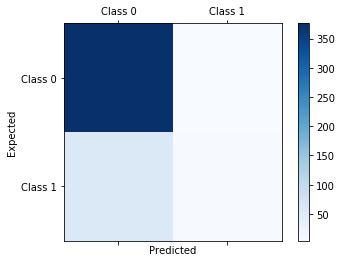

In [32]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
#In the confusion matrix below, the top left corner shows True Positives (the program gusses retention and the answer
#was retention)
#The bottom left corner shows False Positives (The model predicted retention and the answer was attrition)
#It looks like our model just guessed retention 98.2% of the time
#When it did guess attrition, it was right only 25% of the time.

In [33]:
##Let's check the balance between attrition and retention for the data set
attrition = df1[df1['Attrition_Yes'] == 1]
retention = df1[df1['Attrition_Yes'] == 0]
print(attrition.shape, retention.shape)
###It looks like there are significantly more retention numbers than attrition numbers. To counter this,
#we will try undersampling.
#We are using undersampling because when there is a large imbalance between success and failure variables, the model
# can be kind of a smart-ass and will just predict retention for every problem. This will give us an accurate score
#but it kind of defeats the purpose of creating a model.

(237, 55) (1233, 55)


In [34]:
count_class_0, count_class_1 = df.Attrition_Yes.value_counts()
df_class_0 = retention
df_class_1 = attrition
print(df_class_0.shape, df_class_1.shape)

(1233, 55) (237, 55)


In [35]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Attrition_Yes.value_counts())

Random under-sampling:
1    237
0    237
Name: Attrition_Yes, dtype: int64


In [36]:
##Now we will set up the data for random forest modeling for the overall data set
y = df_test_under['Attrition_Yes']
X = df_test_under[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
       'OverTime_Yes']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6993006993006993


In [38]:
feature_imp = pd.Series(clf.feature_importances_, index = attr).sort_values(ascending=False)
feature_imp

MonthlyIncome                        0.059460
OverTime_Yes                         0.058478
YearsAtCompany                       0.051809
HourlyRate                           0.046114
EmployeeNumber                       0.045096
DailyRate                            0.044713
MonthlyRate                          0.043826
Age                                  0.043776
TotalWorkingYears                    0.043078
JobSatisfaction                      0.040895
DistanceFromHome                     0.039489
YearsWithCurrManager                 0.036156
NumCompaniesWorked                   0.034455
PercentSalaryHike                    0.029916
JobLevel                             0.029168
YearsInCurrentRole                   0.028685
StockOptionLevel                     0.028326
JobInvolvement                       0.024300
YearsSinceLastPromotion              0.024233
EnvironmentSatisfaction              0.023903
RelationshipSatisfaction             0.019017
TrainingTimesLastYear             

In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        73
           1       0.69      0.63      0.66        70

   micro avg       0.68      0.68      0.68       143
   macro avg       0.68      0.68      0.68       143
weighted avg       0.68      0.68      0.68       143



In [132]:
from sklearn.model_selection import cross_val_score

cv5 = cross_val_score(clf, X, y, cv=5)
cv5mean = np.mean(cv5)
print(cv5, cv5mean)

[0.375      0.69791667 0.62765957 0.68085106 0.36170213] 0.5486258865248227


Confusion matrix:
 [[20  3]
 [ 6 19]]


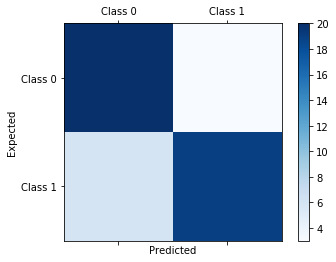

In [134]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [133]:
##It doesn't look like our model is very good at predicting attrition using undersampling.  
#The most likely cause is that we are dealing with complex data and due to the small amount of actual attrition variables,
#there is not enough data for the model to accurately predict whether or not a person will quit.
#Just for fun, let's see if changing the test size improves accuracy. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
#It looks like the accuracy did go up with more data.  Before we celebrate though, let's do some cross-validation

Accuracy: 0.8125


In [114]:
from sklearn.model_selection import cross_val_score

cv5 = cross_val_score(clf, X, y, cv=5)
cv5mean = np.mean(cv5)
print(cv5, cv5mean)
#It doesn't look like it really improved the model.
#As can be seen in the next line, it looks like there are also some slight differences in the feature importance as well.

[0.3125     0.69791667 0.65957447 0.61702128 0.42553191] 0.542508865248227


In [111]:
feature_imp = pd.Series(clf.feature_importances_, index = attr).sort_values(ascending=False)
feature_imp

MonthlyIncome                        0.066422
Age                                  0.054189
YearsAtCompany                       0.051825
EmployeeNumber                       0.047543
TotalWorkingYears                    0.045764
HourlyRate                           0.042820
OverTime_Yes                         0.041586
MonthlyRate                          0.041069
DailyRate                            0.040360
YearsInCurrentRole                   0.036013
StockOptionLevel                     0.033514
DistanceFromHome                     0.033207
YearsWithCurrManager                 0.033013
PercentSalaryHike                    0.030706
JobLevel                             0.030185
JobSatisfaction                      0.027345
NumCompaniesWorked                   0.025249
RelationshipSatisfaction             0.022868
EnvironmentSatisfaction              0.021931
YearsSinceLastPromotion              0.021698
MaritalStatus_Single                 0.021221
JobInvolvement                    

In [116]:
##Let's see what happens if we use oversampling on the data set.
#This will give us a lot more data to work with but since there 5 times as many retention lines as attrition lines,
#there is going to be over-representation of the people who quit
##Now let's look at oversampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Attrition_Yes.value_counts())

Random over-sampling:
1    1233
0    1233
Name: Attrition_Yes, dtype: int64


In [117]:
df_test_over.columns

Index(['Attrition_Yes', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Ge

In [135]:
y = df_test_over['Attrition_Yes']
X = df_test_over[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Over18_Y', 'OverTime_Yes']]

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [137]:
cv5 = cross_val_score(clf, X, y, cv=5)
cv5mean = np.mean(cv5)
print(cv5, cv5mean)

[0.52834008 0.96761134 0.96153846 0.97154472 0.55284553] 0.7963760244889898


Confusion matrix:
 [[123   0]
 [  0 124]]


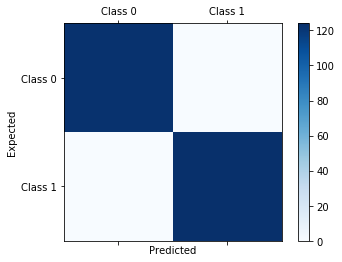

In [138]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
#Oversampling produced much more accurate results but it's very suspicious that it never guessed wrong
#This is most likely because every instance of attrition is repeated 5 times in the data set so the model was
#better at memorizing the data than actually using it to make predictions.